In [1]:
##Research Question:What types of properties are most commonly listed in New York City Airbnb Dataset and how the property type affect the price and availability for booking?

In [2]:
import pandas as pd
import seaborn  as sns
from matplotlib import pyplot as plt

In [3]:
Dataset=pd.read_csv('AB_NYC_2019.csv')

In [4]:
#The display.max_columns option controls the number of columns to be printed (none represent all the columns included in the dataset)
pd.set_option('display.max_columns', None)
#You can change the width of the column with the option max_colwidth (none represent the maximum characters included in a cell within the dataset) 
pd.set_option('max_colwidth', None)

In [5]:
Dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
#The dataset involves 48895 rows and 16 columns 
Dataset.shape

(48895, 16)

In [7]:
#Check the data type of the variables within the dataset
Dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
#Transform the variables 'id' and 'host_id' from numerical variable into objects(we desrire these variables to be treated as objects and not numbers)
#For example it doesnt make sense to find the mean or median of the 'id' variable 
Dataset = Dataset.astype({'id': object,'host_id':object})

In [9]:
Dataset.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
#I have divided the last review_variabel into last_review_year,last_review_month and last_review_day for better exploration 
Dataset[['last_review_year','last_review_month','last_review_day']]=Dataset['last_review'].str.split('-',expand=True)

In [11]:
#Drop the last_review variable which we already divided in the previous step
Dataset=Dataset.drop(['last_review'], axis=1)

In [12]:
Dataset.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
last_review_year                   object
last_review_month                  object
last_review_day                    object
dtype: object

In [13]:
Dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07,05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,NaN,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,NaN,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,NaN,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,NaN,NaN,NaN


In [14]:
import missingno as msno

In [15]:
#We can observe that the most important variables we should take into cosideration have no missing values
#Therefore we should just ignore the the missing values and continue the exploration 
Dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_year                  10052
last_review_month                 10052
last_review_day                   10052
dtype: int64

<AxesSubplot:>

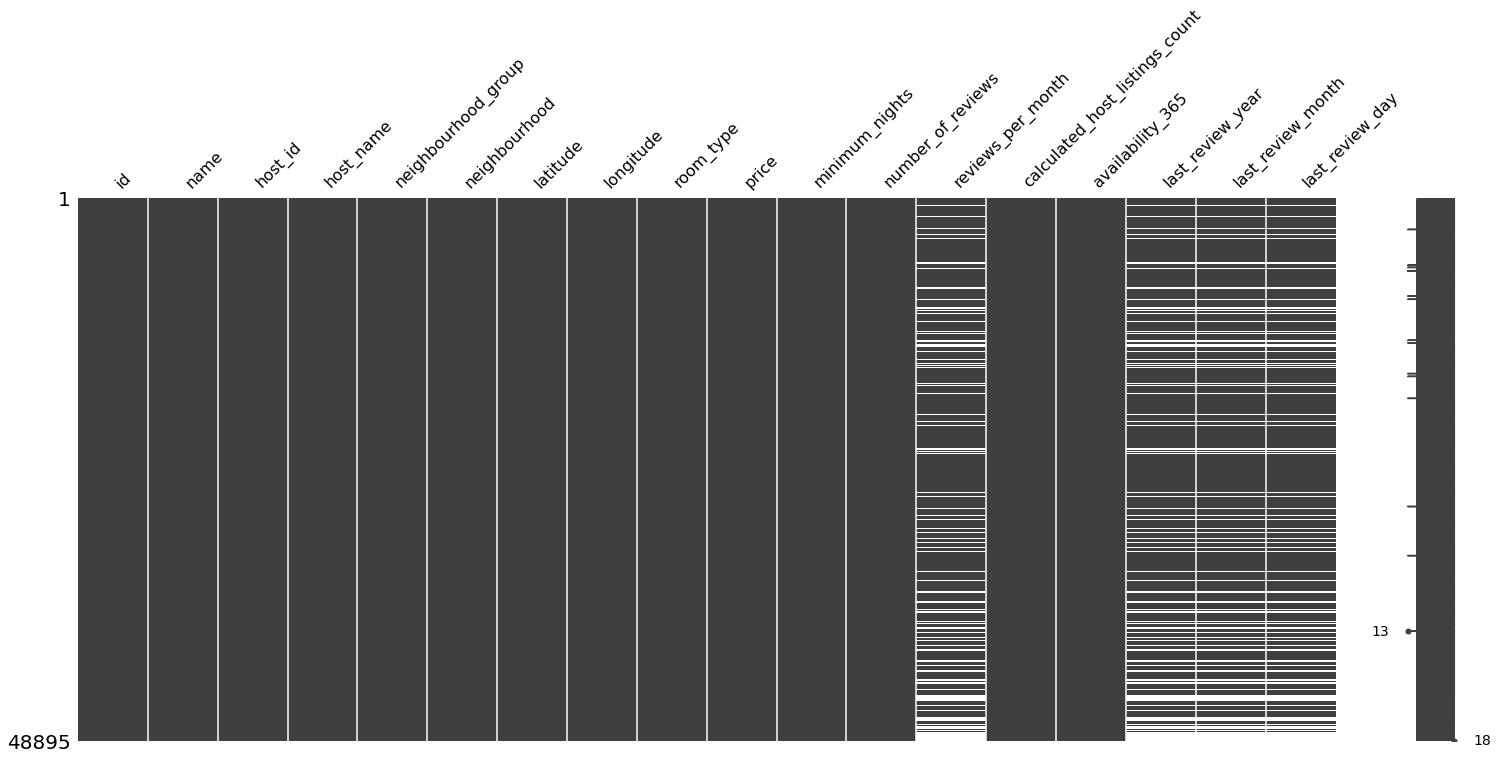

In [16]:
#This step helps us to understand where are the missing values located within our dataset
msno.matrix(Dataset)

In [17]:
#For the machine learning models we will take place we dont really need the variable with the missing values so we should just remove these variables
Dataset=Dataset.drop(['name','host_name','reviews_per_month','last_review_year','last_review_month','last_review_day'],axis='columns')

In [18]:
#Observe the relevant details of each object variable within the dataset
Dataset[['id','host_id','neighbourhood_group','neighbourhood','room_type']].describe()

,id,host_id,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895,48895,48895
unique,48895,37457,5,221,3
top,2539,219517861,Manhattan,Williamsburg,Entire home/apt
freq,1,327,21661,3920,25409


In [19]:
#The object variables within the dataset seem correct since:
#The 'id' variable which represents listing ID is unique as should be 
#Some hosts have in their property more than one residence which makes sense as well
#My only concern is that the host with number '219517861' has too many residences in his possession so that seems a little strange to me
#We have 5 unique locations in which the properties exist which makes sense
#We have 221 unique areas(neighbourhoud) in which the properties exist which makes sense
#We have 3 unique room types which makes sense as well

In [20]:
#Below we can observe the summary statistics of the numerical variables of our dataset 
Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [21]:
#We can observe that the latitude and longitude variable have a very small standard deviation and thus data are clustered around the mean values(This indicates that the properties are located close by to each other)
#The unusual measure in relevance to the price is that the min value is 0.00.These are propably records which habe been written incorrectly so we should drop these records.In addition there are too many outliers within this variable that makes me a little concerned as regards the validity of the records 

In [22]:
Dataset[Dataset.price==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6,333


In [23]:
#Drop the records where the price value is '0'
Dataset=Dataset.drop([23161,25433,25634,25753,25778,25794,25795,25796,26259,26841,26866])

In [24]:
#The summary statistics within the variable minimum_nights seems logical.However we should examine the following:

In [25]:
#Delete records in which minimum_nights(amount of nights minimum) is less than availability_365   
Dataset=Dataset[Dataset.availability_365>Dataset.minimum_nights] 

In [26]:
#There is not anything strange with the number_of_reviews variable

In [27]:
#The minimum value of the variable number_of_reviews is 0.00.However the minimum value of reviews_per_months is 0.01 rather than 0.00
#The explanation for that is the fact that all the records with values 0.00 within the number_of_reviews contain an NaN value within the corresponding reviews_per_month variable as shown below and thus they are not included in the summary statistics.

In [28]:
Dataset[Dataset.number_of_reviews==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2,249
36,11452,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,1,365
38,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,1,365
204,54466,253385,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [29]:
#There are some outliers within the variable calculated_host_listings_count(amount of listing per host).However we can not be certain if the corresponding records are incorrect.
#Propably some hosts are very rich they own a large number of properties

In [30]:
#We should exlude all the properties which are not available anymore 
Dataset=Dataset[Dataset.availability_365!=0]

In [31]:
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [32]:
#We should explore the value counts of the room type variable(this is usefule to answer the question given)
print(Dataset[['room_type']].value_counts())

room_type      
Entire home/apt    15754
Private room       13568
Shared room          849
dtype: int64


In [33]:
#As we can see there very very few properties with prices more than 1000 dollars 
#We assume that this is propably a mistake of the dataset and we drop the relevant records
Dataset=Dataset[Dataset.price<=1000]

In [34]:
#Calculation of the skewness and kurtosis of the price variable(we should give more attention to this variable since it is mentioned in the question)
skewness_of_price=Dataset['price'].skew()
kurtosis_of_price=Dataset['price'].kurt()

In [35]:
#Skewness is a measure of symmetry of the distribution
#The price variable is positively skewed(the tail of the distribution is more pronounced on the right side than it is on the left)
skewness_of_price

2.782595510288187

In [36]:
#The value of kyrtosis is aproximately 11 which indicates that the distribution is too peaked
kurtosis_of_price

10.990149383963127

In [37]:
#Calculation of the skewness and kurtosis of the availability_365 variable(we should give more attention to this variable since it is mentioned in the question)
skewness_of_availability=Dataset['availability_365'].skew()
kurtosis_of_availability=Dataset['availability_365'].kurt()

In [38]:
#The value of skewness of the variable indicates that this variable is nearly symmetrical 
skewness_of_availability

0.08528724137360862

In [39]:
#The value os kurtosis of the variable indicates that the distribution has light tails
kurtosis_of_availability

-1.472077753946266

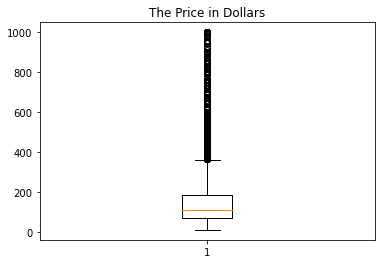

In [40]:
#Create the boxplot of the variables 'availability_365' and 'price'
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
plt.boxplot(Dataset.price)
plt.title("The Price in Dollars")
# show plot
plt.show()

In [41]:
#Delete all the records with the outliers in price
Dataset=Dataset[Dataset.price<=301]

In [42]:
#We can observe that there are some outliers above the value of 400 dollars price as indicated from its skewness and kurtois as well 

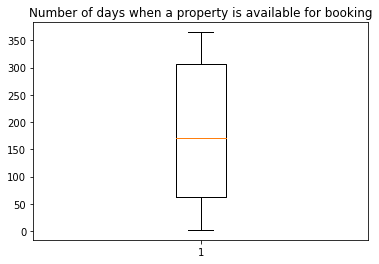

In [43]:
#Creating plot
plt.boxplot(Dataset.availability_365)
plt.title("Number of days when a property is available for booking")
#Show plot
plt.show()
#We can observe that there are no outliers within this variable as indicated from its skewness and kurotis as well

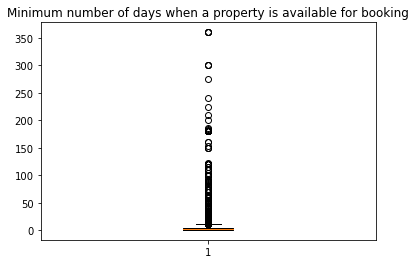

In [44]:
#Creating plot
plt.boxplot(Dataset.minimum_nights)
plt.title("Minimum number of days when a property is available for booking")
#Show plot
plt.show()

In [45]:
#Delete all the records with the outliers in minimum nights
Dataset=Dataset[Dataset.minimum_nights<7]

In [46]:
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31
48889,36484363,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36


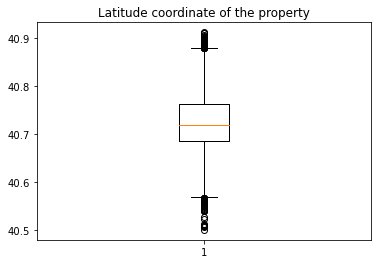

In [47]:
#Creating plot
plt.boxplot(Dataset.latitude)
plt.title("Latitude coordinate of the property")
#Show plot
plt.show()
#In this situation we presevre the outliers since they are too close to the upper and lower boundaries 

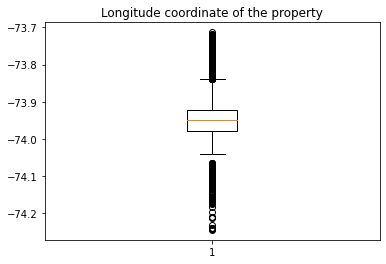

In [48]:
#Creating plot
plt.boxplot(Dataset.longitude)
plt.title("Longitude coordinate of the property")
#Show plot
plt.show()
#In this situation we presevre the outliers since they are too close to the upper and lower boundaries  

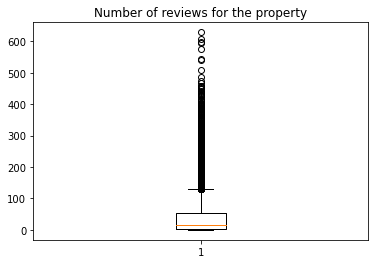

In [49]:
#Creating plot
plt.boxplot(Dataset.number_of_reviews)
plt.title("Number of reviews for the property")
#Show plot
plt.show()
#We will presevre the outliers since this boxplot corresponds to reality(for some properties theere are too many reviews)

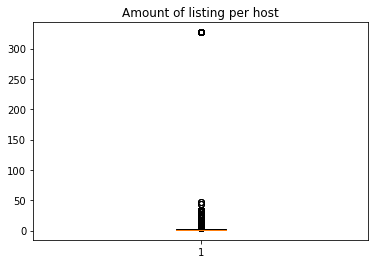

In [50]:
#Creating plot
plt.boxplot(Dataset.calculated_host_listings_count)
plt.title("Amount of listing per host")
#Show plot
plt.show()
#We are not in a position to tell that the outliers are due to errors since there are reach people who belong too many properties 

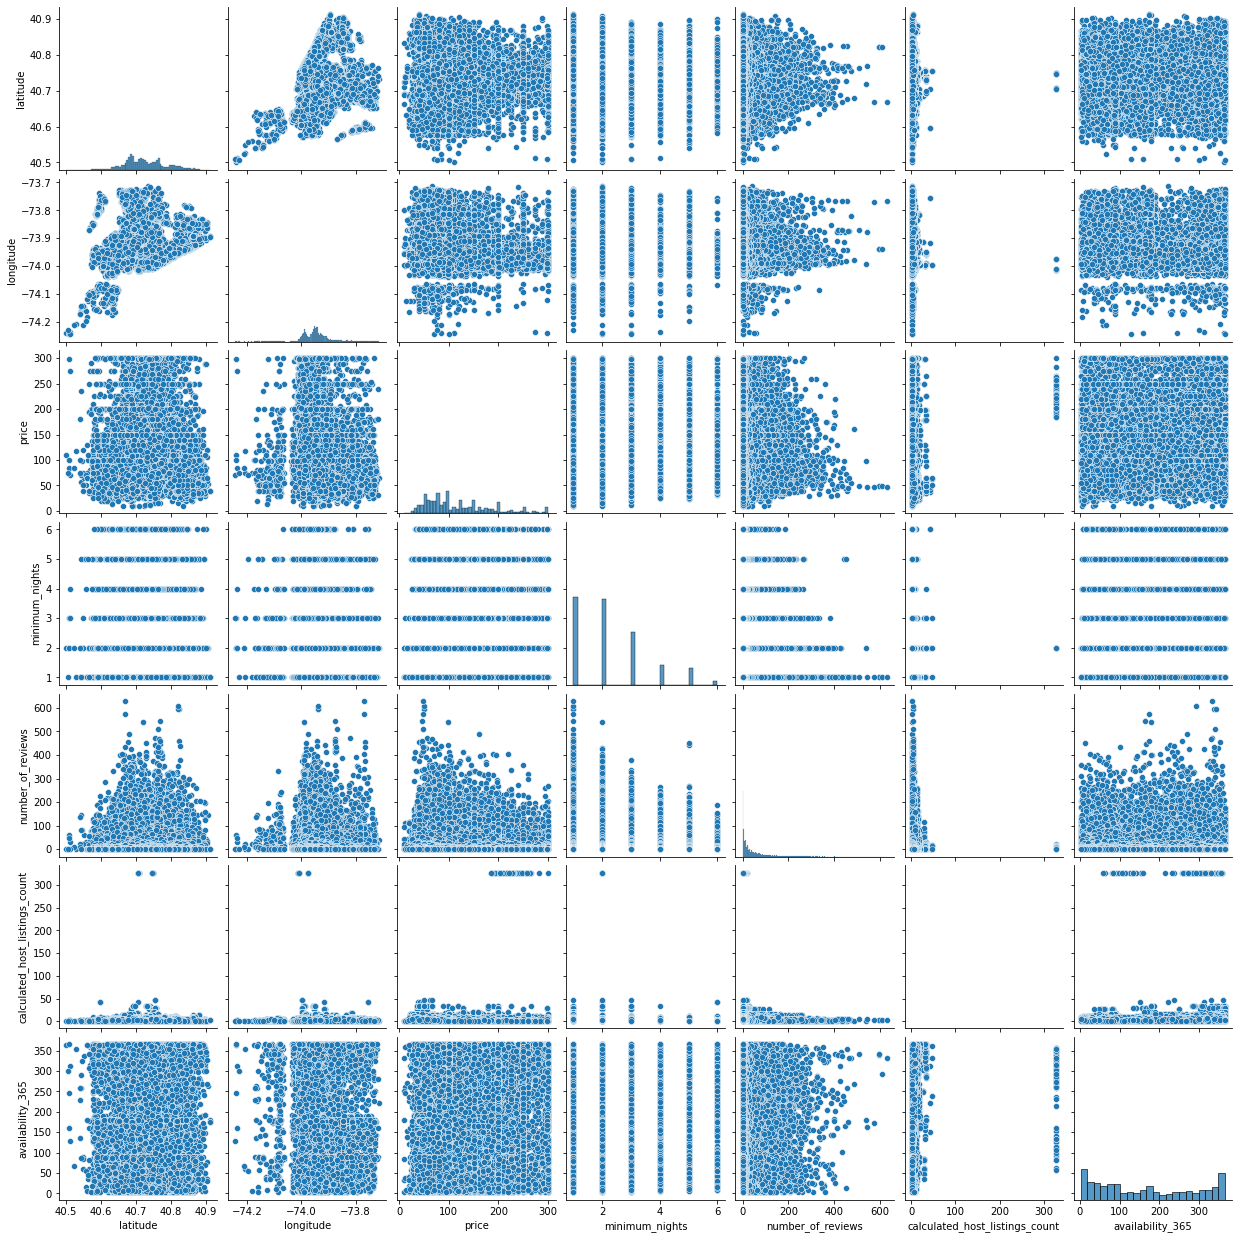

In [51]:
#Perfom the scatterplot between the numerical variables to confirm the above correlations
sns.pairplot(Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']])

In [52]:
#Calculation of the correlation among the numerical variables of our dataset with the spearman method since this is more accorate method than pearson, when we dont deal with variables where exist linear relationship (as indicated in the pairwise-scatter plots above there is no demonstration that linear relationship exists among the numerical variables of our dataset)
Correlation=Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].corr(method='spearman')

<AxesSubplot:>

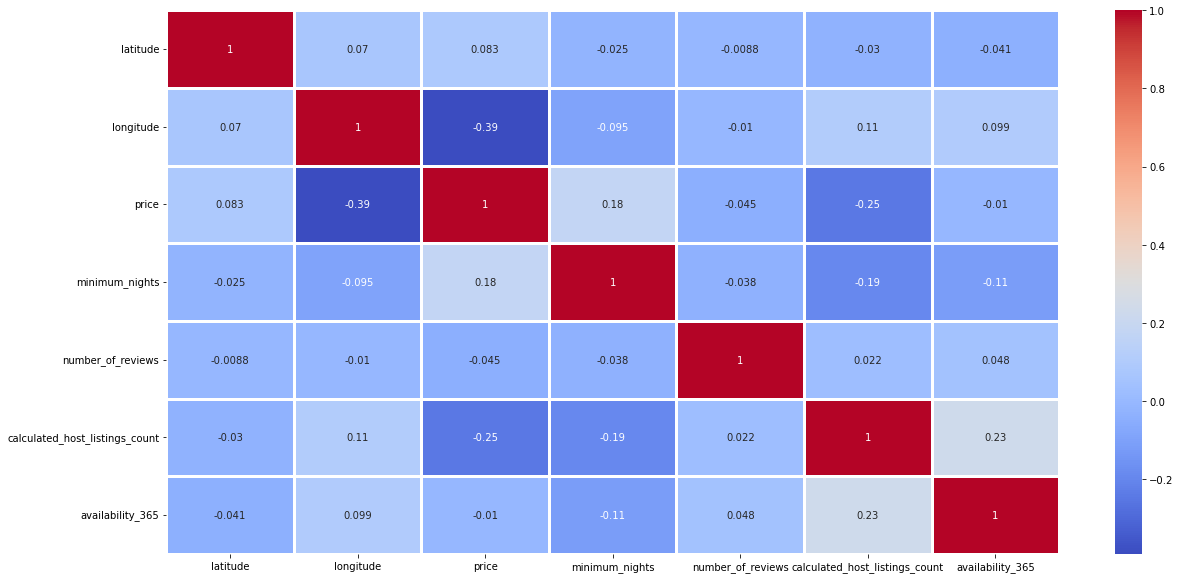

In [53]:
#Display the heatmap in which we can observe the value of the correlation among the numerical variables
plt.figure(figsize=(20,10))
sns.heatmap(Correlation,annot=True,cmap='coolwarm',linecolor='white',linewidths=3)

In [54]:
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31
48889,36484363,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36


In [55]:
#Display the updated statistical summary of the new dataset created(after deleting some varibales and records as shown above) for the numerical variables 
Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,21780.000000,21780.000000,21780.000000,21780.000000,21780.000000,21780.000000,21780.000000
mean,40.725880,-73.942475,119.255464,2.270983,40.145317,4.429293,166.025115
std,0.059818,0.055147,66.551522,1.250312,57.061100,26.327039,122.668684
min,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,2.000000
25%,40.685080,-73.978950,67.000000,1.000000,4.000000,1.000000,53.000000
50%,40.718365,-73.948985,100.000000,2.000000,17.000000,1.000000,150.500000
75%,40.763220,-73.923340,158.000000,3.000000,54.000000,2.000000,284.000000
max,40.913060,-73.712990,301.000000,6.000000,629.000000,327.000000,365.000000


In [56]:
#Display the updated statistical summary of the new dataset created(after deleting some varibales and records as shown above) for the categorical variables
Dataset[['id','host_id','neighbourhood_group','neighbourhood','room_type']].describe()

,id,host_id,neighbourhood_group,neighbourhood,room_type
count,21780,21780,21780,21780,21780
unique,21780,16364,5,217,3
top,2539,219517861,Brooklyn,Bedford-Stuyvesant,Private room
freq,1,142,9239,1958,11250


In [57]:
#Plot the data distribution of the price(price in dollars) and availability_365(number of days when listing is available for booking)

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

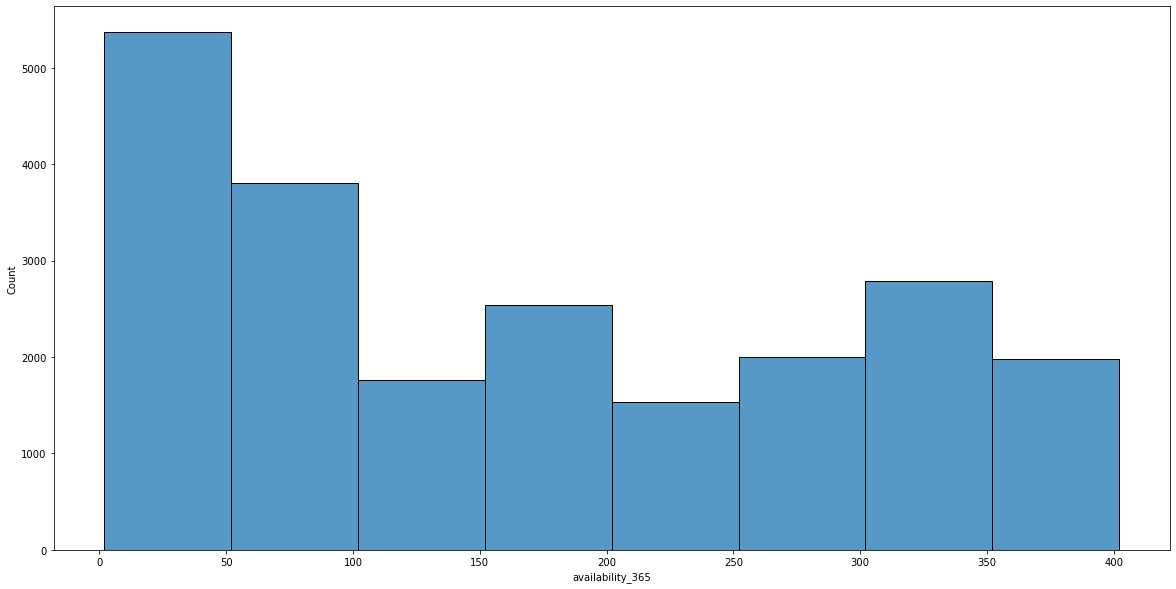

In [58]:
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking) and get a general idea of the distribution  
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='availability_365',binwidth=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

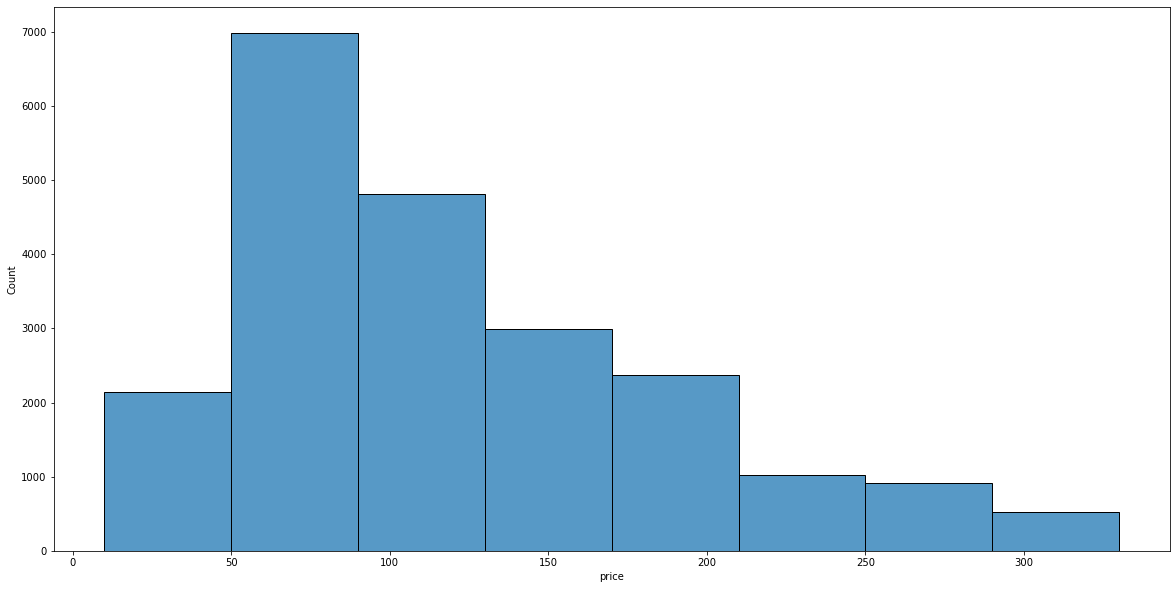

In [59]:
#Plot the histogram of the price variable and get a general idea of the distribution
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='price',binwidth=40)

Text(0.5, 1.0, 'Type of properties')

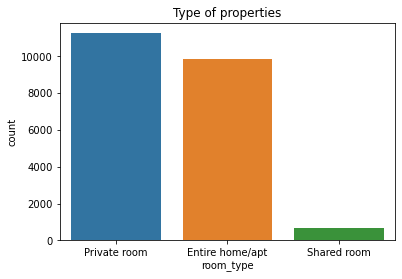

In [60]:
#What type of properties are most commonly listed on New York City Airbnb Open Data
#We can observe that private rooms are the most commonly listed followed by entire home/apt room types with a small difference
#We can also observe that the minority is the shared room type with a big difference from the rest categories
from matplotlib import pyplot as plt
sns.countplot(data=Dataset,x='room_type')
plt.title("Type of properties")

Text(0.5, 1.0, 'Histogram of availability with respect to room type')

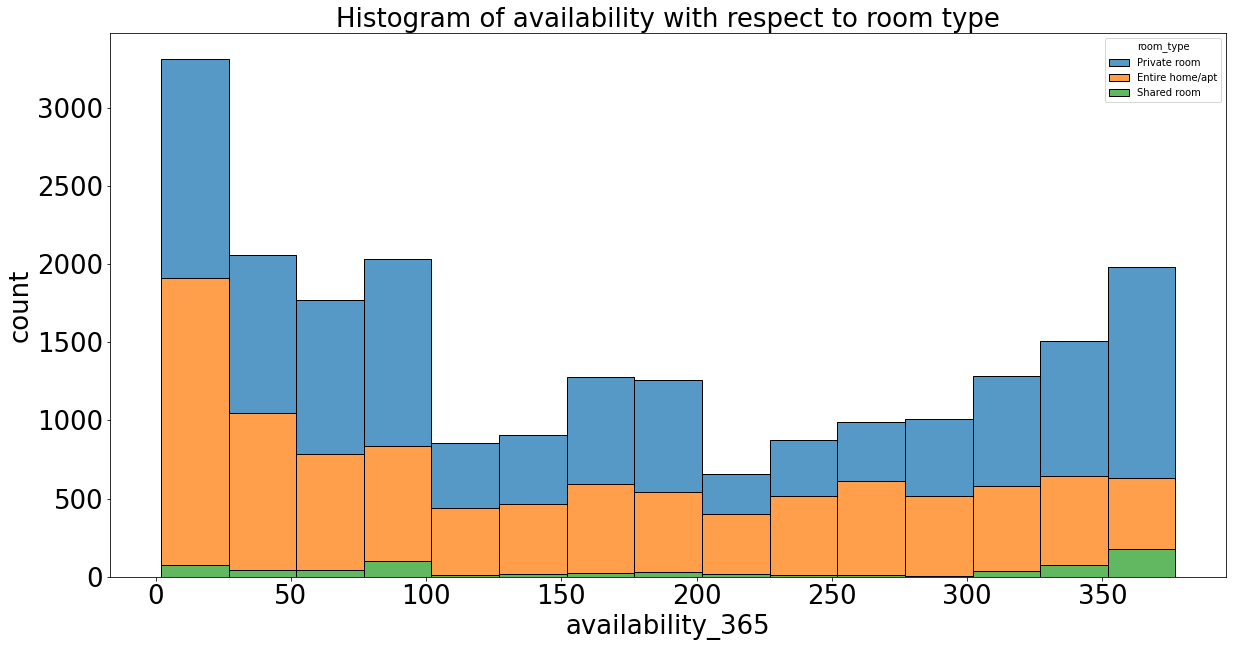

In [88]:
#How does the property type affect the price? 
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking)
#There is not a significant pattern here in relevance to the room_types(they are almost equally spread)
#However we can opbserve that most of the properties are available between 10-100 days or 300-365 days
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,binwidth=25,x='availability_365',hue='room_type',multiple="stack")
sns.histplot()
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('availability_365', fontsize=26)
plt.ylabel('count', fontsize=26)

plt.title('Histogram of availability with respect to room type',size=26)

Text(0.5, 1.0, 'Histogram of price with respect to room type')

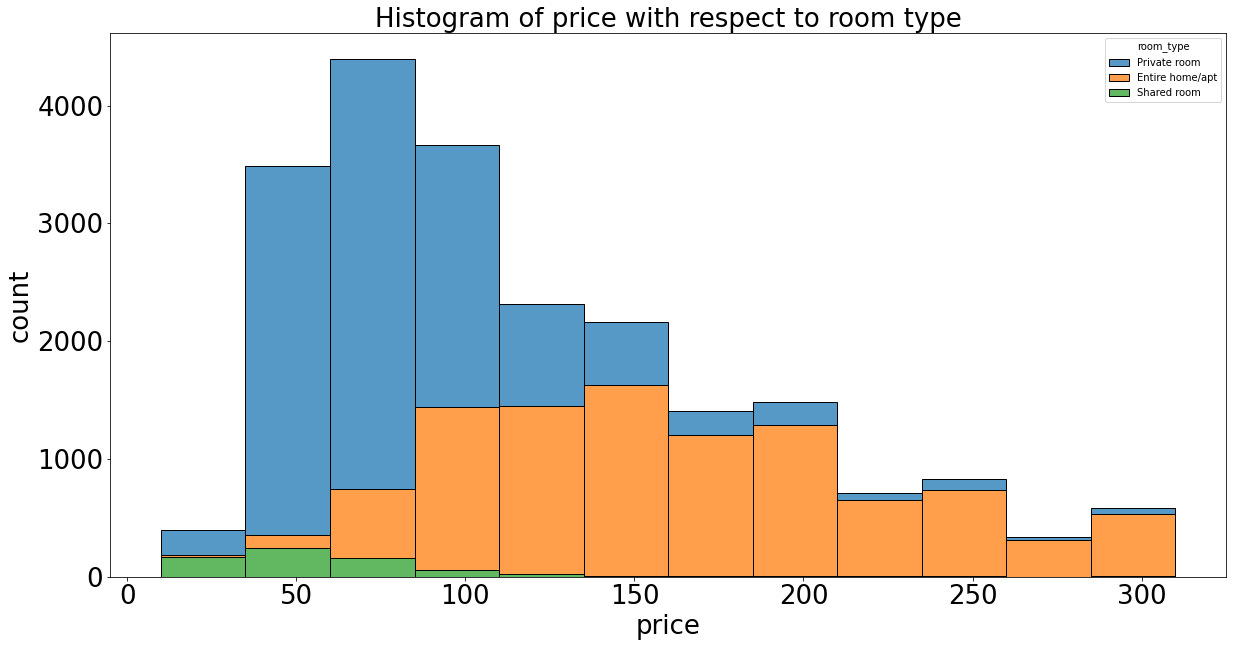

In [90]:
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking) 
#We can observe that Entire home/apt are more expensive than private rooms.Also shared rooms are the cheapest properties
#we can observe that there is a pattern as regards the room types and prices(entire home/apt seems to be the most expensive room type)
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='price',binwidth=25,hue='room_type',multiple='stack')
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('price', fontsize=26)
plt.ylabel('count', fontsize=26)
plt.title('Histogram of price with respect to room type',size=26)

In [91]:
#We should try to explain the above graphs with the following contigency table and our personal experience(criticality)
#Maybe some areas are more expensive than others and some areas are only approachable only a limited number of days within a year  
data_crosstab = pd.crosstab(Dataset['room_type'], 
                            Dataset['neighbourhood_group'],
                                margins = False)
print(data_crosstab)

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        259      4307       3882    1260            135
Private room           501      4719       3705    2170            155
Shared room             43       213        278     145              8


In [92]:
#Machine Learning algorithms

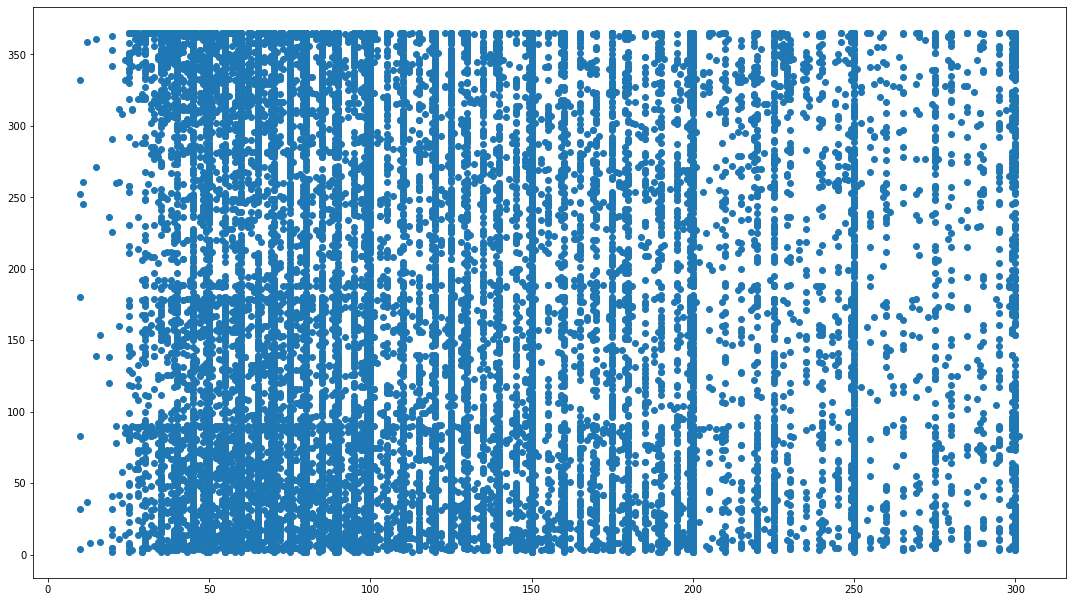

In [93]:
#Create the scatter plot between the 'price' and 'availability' variables which I am going to perform a clustering algorithm(get an initial perception of the variables) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset.price,Dataset.availability_365)

In [94]:
from sklearn.cluster import KMeans

In [95]:
#Perform clustering using 5 clusters
#We use k-means++ centroid initialization for the algorithm(this is a good method of spearding out the initial centroids and thus speeds up the algorithm's convergence)
#I choose randomly number of clusters to be 5
#n_init represent the times which the algorithm will run with different centroids chosen.Eventually the chosen centroids will be those which decrease inertia at the final stage 
#Define max iterations to be 300
km=KMeans(n_clusters=5,init= "k-means++",n_init= 15,max_iter=300)
km

KMeans(n_clusters=5, n_init=15)

In [96]:
#Assign each record into one cluster of the 5 clusters created previously
y_predicted=km.fit_predict(Dataset[['price','availability_365']])
print(y_predicted)

[0 4 0 ... 1 1 1]


In [97]:
#Append on the current dataset another one column which shows the clustering of each record
Dataset['clusters']=y_predicted
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,4
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,2
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31,1
48889,36484363,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163,2
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,1
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,1


In [98]:
#Seperate the initial Dataset into 5 subdatasets each one including records of the same cluster
Dataset1=Dataset[Dataset.clusters==0]
Dataset2=Dataset[Dataset.clusters==1]
Dataset3=Dataset[Dataset.clusters==2]
Dataset4=Dataset[Dataset.clusters==3]
Dataset5=Dataset[Dataset.clusters==4]

Text(0.5, 1.0, 'The scatterplot of the price and availability')

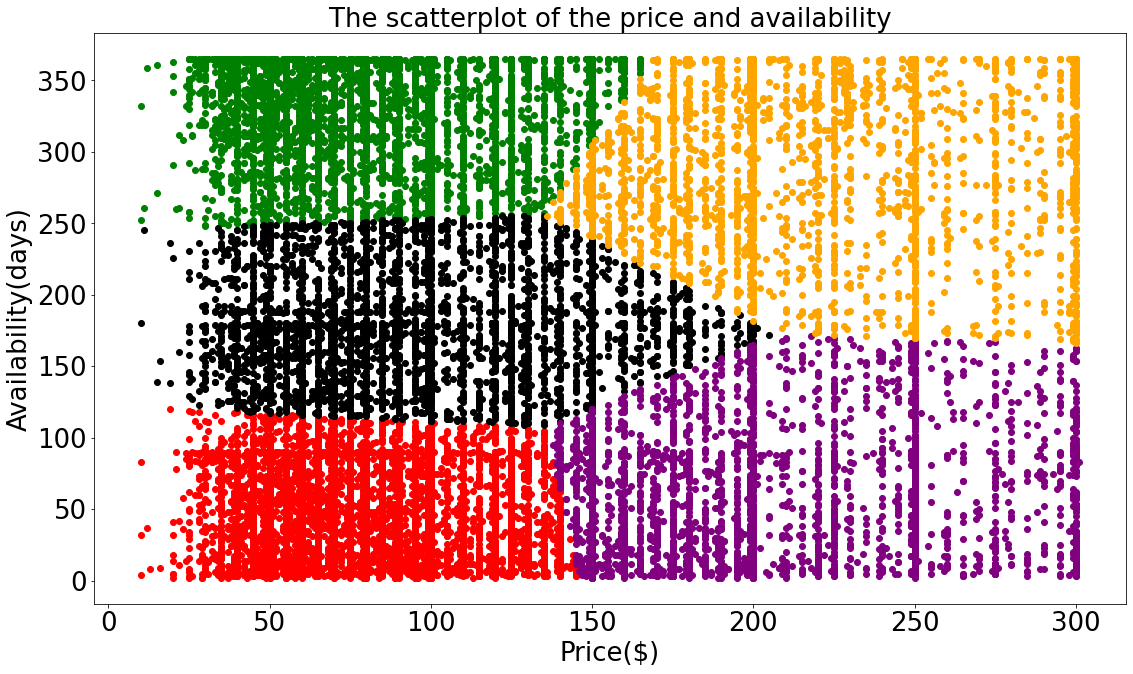

In [103]:
#Plot the scatter plot of the variables of interest(different colors represent different clusters) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset1.price,Dataset1.availability_365,color='green')
plt.scatter(Dataset2.price,Dataset2.availability_365,color='red')
plt.scatter(Dataset3.price,Dataset3.availability_365,color='black')
plt.scatter(Dataset4.price,Dataset4.availability_365,color='purple')
plt.scatter(Dataset5.price,Dataset5.availability_365,color='orange')
plt.xlabel('Price($)')
plt.ylabel('Availability(days)')

plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Price($)', fontsize=26)
plt.ylabel('Availability(days)', fontsize=26)
plt.title('The scatterplot of the price and availability',size=26)

In [100]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [101]:
#Convert the scaling of the variables 'price' and 'availability_365' into the interval [0,1] so that there is no difference in the range of the axes which can affect the algorithm 
Dataset['price']=NormalizeData(Dataset['price'])
Dataset['availability_365']=NormalizeData(Dataset['availability_365'])
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.477663,1,9,6,1.000000,0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.738832,1,45,2,0.972452,4
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,0.481100,3,0,1,1.000000,0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.271478,1,270,1,0.528926,2
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,0.652921,3,74,1,0.349862,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,0.395189,4,0,1,0.079890,1
48889,36484363,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,0.189003,1,0,2,0.443526,2
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,0.206186,2,0,2,0.019284,1
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,0.103093,4,0,2,0.093664,1


In [102]:
#Perform once again the clustering algorithm to observe if there are any differences in relevance to the perfomance of the scaled variables
km=KMeans(n_clusters=5,init= "k-means++",n_init= 15,max_iter=300)
y_predicted=km.fit_predict(Dataset[['price','availability_365']])
y_predicted

array([1, 2, 1, ..., 0, 0, 0])

In [75]:
#Replace on the current dataset the updated clusters which shows the updated clustering of each record
Dataset['clusters']=y_predicted
Dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.477663,1,9,6,1.000000,3
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.738832,1,45,2,0.972452,2
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,0.481100,3,0,1,1.000000,3
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.271478,1,270,1,0.528926,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,0.652921,3,74,1,0.349862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,0.395189,4,0,1,0.079890,4
48889,36484363,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,0.189003,1,0,2,0.443526,0
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,0.206186,2,0,2,0.019284,4
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,0.103093,4,0,2,0.093664,4


In [76]:
#Seperate the initial Dataset into 5 subdatasets each one including records of the same cluster
Dataset1=Dataset[Dataset.clusters==0]
Dataset2=Dataset[Dataset.clusters==1]
Dataset3=Dataset[Dataset.clusters==2]
Dataset4=Dataset[Dataset.clusters==3]
Dataset5=Dataset[Dataset.clusters==4]

In [77]:
#Display the 5 centroids of the clustering algorithm 
km.cluster_centers_

array([[0.27920081, 0.48696339],
       [0.6523255 , 0.16179599],
       [0.70977053, 0.77167075],
       [0.24912601, 0.89483721],
       [0.24279846, 0.12661249]])

Text(0.5, 1.0, 'The prerformance of the clustering algorithm(centroids are displayed with the symbol +')

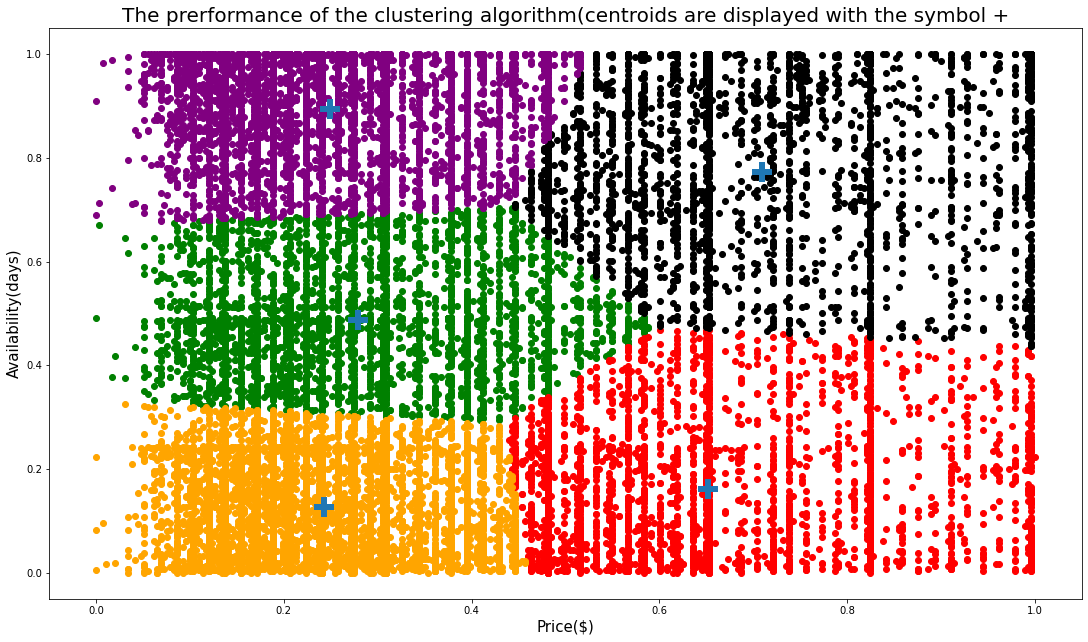

In [78]:
#Plot the scatter plot of the variables of interest(different colors represent different clusters) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset1.price,Dataset1.availability_365,color='green')
plt.scatter(Dataset2.price,Dataset2.availability_365,color='red')
plt.scatter(Dataset3.price,Dataset3.availability_365,color='black')
plt.scatter(Dataset4.price,Dataset4.availability_365,color='purple')
plt.scatter(Dataset5.price,Dataset5.availability_365,color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centorid',linewidths=20)
plt.xlabel('Price($)',size=15)
plt.ylabel('Availability(days)',size=15)
plt.title('The prerformance of the clustering algorithm(centroids are displayed with the symbol +',size=20)

In [79]:
#Calculate the Sum of Squares Error value for different number of clusters
k_range=range(1,10)
Sum_of_Squares_Error=[]
for k in k_range:
    km=KMeans(n_clusters=k,init= "k-means++",n_init= 15,max_iter=300)
    km.fit(Dataset[['price','availability_365']])
    Sum_of_Squares_Error.append(km.inertia_)

In [80]:
#We can observe that while increasing the number of clusters the Sum of Squares Error is decreasing(howver the error is still to large since there exist too many records within our dataset)
Sum_of_Squares_Error

[3626.2093829469577,
 1638.087114522479,
 1147.079219863167,
 812.4920886803034,
 591.9885357421293,
 505.09800431631146,
 434.2812582004155,
 380.4774143235378,
 338.71770179656943]

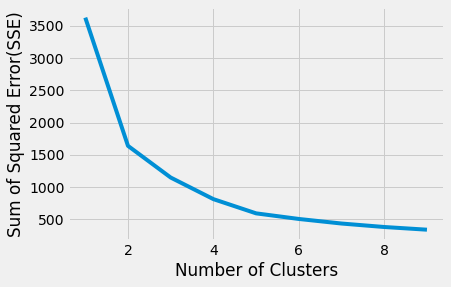

In [81]:
#Using the elbow rule we can observe that the best choice for number of clusters to perfom our algorithm is 5.
plt.style.use("fivethirtyeight")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error(SSE)')
plt.plot(k_range,Sum_of_Squares_Error)

In [82]:
#Silhouette coefficients is a measure of cluster cohesion and seperation(It quantifies how well a data point fits into its assigned cluster based on two factors:

#1.How close the data point is to other points in the cluster
#2.How far away the data point is from points in other clusters

#Calculate the silhouette coefficients
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(Dataset[['price','availability_365']])
    score = silhouette_score(Dataset[['price','availability_365']], kmeans.labels_)
    silhouette_coefficients.append(score)
    print('Choosing the number of clusters to be equal to',k,'the corresponding silhouette coefficient is',silhouette_coefficients[k-2])

#As we can see below the best choices of number of clusters is 2,3 and 5 since the value of the silhouette coefficients in these situations have the maximum scores

Choosing the number of clusters to be equal to 2 the corresponding silhouette coefficient is 0.4928128435722896
Choosing the number of clusters to be equal to 3 the corresponding silhouette coefficient is 0.4539714870673677
Choosing the number of clusters to be equal to 4 the corresponding silhouette coefficient is 0.43221477759789995
Choosing the number of clusters to be equal to 5 the corresponding silhouette coefficient is 0.44642733410852337
Choosing the number of clusters to be equal to 6 the corresponding silhouette coefficient is 0.42421968581715536
Choosing the number of clusters to be equal to 7 the corresponding silhouette coefficient is 0.427417064102737
Choosing the number of clusters to be equal to 8 the corresponding silhouette coefficient is 0.39959462939780416
Choosing the number of clusters to be equal to 9 the corresponding silhouette coefficient is 0.38214001875620457


In [83]:
#Calculate the count,mean,std,min,25%,median,75% and max for each numerical variable within our dataset, seperately for each group of records assigned to a different cluster.
#In this way we can distinguish some differences for each cluster in relevance to the numerical variables of our dataset  
Dataset.groupby('clusters').describe()

latitude                                                      \
            count       mean       std       min       25%        50%   
clusters                                                                
0          4092.0  40.725466  0.063923  40.50873  40.68200  40.713910   
1          3500.0  40.730056  0.045021  40.53871  40.70205  40.728090   
2          2727.0  40.727545  0.049922  40.50868  40.69172  40.724970   
3          4854.0  40.721559  0.066944  40.49979  40.67824  40.709095   
4          6607.0  40.726410  0.062028  40.52293  40.68464  40.713990   

                              longitude                                 \
                75%       max     count       mean       std       min   
clusters                                                                 
0         40.766420  40.91306    4092.0 -73.933644  0.057946 -74.24442   
1         40.760638  40.88238    3500.0 -73.964280  0.039492 -74.16966   
2         40.759325  40.90260    2727.0 -73.961875  0.045745 -74.23986   
3         40.762982  40.90804    4854.0 -73.929386  0.063564 -74.24285   
4         40.765745  40.90406    6607.0 -73.938002  0.051841 -74.21238   

                                                      price            \
                25%        50%        75%       max   count      mean   
clusters                                                                
0        -73.964337 -73.942665 -73.913820 -73.71299  4092.0  0.279562   
1        -73.990190 -73.970925 -73.949095 -73.71690  3500.0  0.652723   
2        -73.990610 -73.967240 -73.943565 -73.71829  2727.0  0.709683   
3        -73.960030 -73.939340 -73.907130 -73.72173  4854.0  0.249013   
4        -73.963070 -73.944650 -73.921285 -73.71928  6607.0  0.242886   

                                                                      \
               std       min       25%       50%       75%       max   
clusters                                                               
0         0.123686  0.000000  0.175258  0.261168  0.378007  0.587629   
1         0.154275  0.439863  0.515464  0.635739  0.749141  1.000000   
2         0.154476  0.446735  0.584192  0.652921  0.824742  0.996564   
3         0.111467  0.000000  0.161512  0.230241  0.309278  0.515464   
4         0.097547  0.000000  0.168385  0.237113  0.309278  0.457045   

         minimum_nights                                               \
                  count      mean       std  min  25%  50%  75%  max   
clusters                                                               
0                4092.0  2.187195  1.236870  1.0  1.0  2.0  3.0  6.0   
1                3500.0  2.645143  1.282956  1.0  2.0  2.0  3.0  6.0   
2                2727.0  2.378071  1.205759  1.0  1.0  2.0  3.0  6.0   
3                4854.0  2.029254  1.190996  1.0  1.0  2.0  3.0  6.0   
4                6607.0  2.258060  1.251521  1.0  1.0  2.0  3.0  6.0   

         number_of_reviews                                                     \
                     count       mean        std  min  25%   50%   75%    max   
clusters                                                                        
0                   4092.0  49.185239  65.819731  0.0  6.0  23.0  68.0  576.0   
1                   3500.0  27.377429  40.700091  0.0  2.0  11.0  35.0  396.0   
2                   2727.0  45.481848  60.797340  0.0  4.0  19.0  66.0  488.0   
3                   4854.0  43.635352  62.062286  0.0  4.0  19.0  59.0  629.0   
4                   6607.0  36.543514  51.464227  0.0  4.0  16.0  49.0  451.0   

         calculated_host_listings_count                                       \
                                  count       mean        std  min  25%  50%   
clusters                                                                       
0                                4092.0   2.361437   2.959122  1.0  1.0  1.0   
1                                3500.0   3.470857  24.673368  1.0  1.0  1.0   
2                                2727.0  16

C:\Users\stell\AppData\Local\Temp/ipykernel_820/3148523095.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


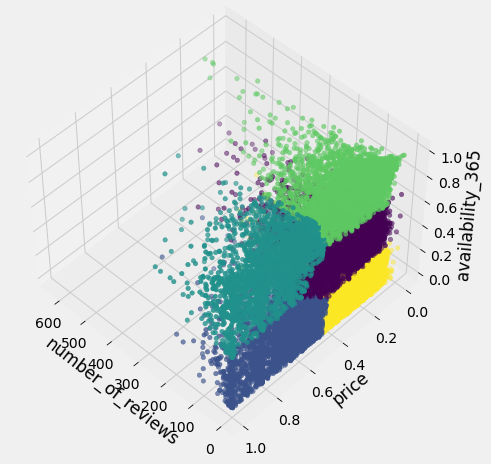

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('price')
ax.set_zlabel('availability_365')
ax.scatter(Dataset['number_of_reviews'], Dataset['price'], Dataset['availability_365'], c= Dataset['clusters'])